In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os



In [2]:
def model_train(model, x, y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad( ) #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr, loss_arr, prediction

In [3]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = (np.sin(5*np.pi*x))/(5*np.pi*x) # non-linear y function
print(y.shape)


(300, 1)
(300, 1)


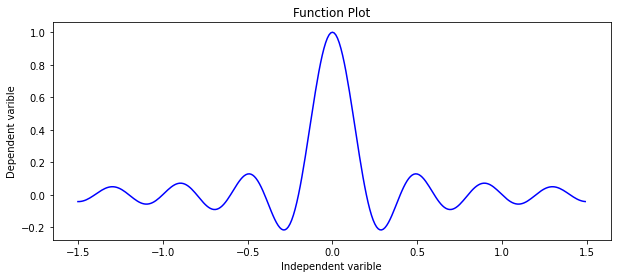

In [4]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "blue")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [ ]:
# Model 1

In [5]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5) #hidden layer
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)#output layer
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x)) # activation function for the hidden layer
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)  
        return x
 
model_1 = Model1()

In [6]:
optimizer = torch.optim.Adam(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4) # learning rate = 0.001,weight decay=0.0001
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_1, x, y)

571


/home/skomara/.local/lib/python3.9/site-packages/torch/autograd/graph.py:769: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch: 500, loss = 0.0519
epoch: 1000, loss = 0.0037
epoch: 1500, loss = 0.0025
epoch: 2000, loss = 0.0024
epoch: 2500, loss = 0.0024
epoch: 3000, loss = 0.0023
epoch: 3500, loss = 0.0022
epoch: 4000, loss = 0.0013
epoch: 4500, loss = 0.0013
epoch: 5000, loss = 0.0013
epoch: 5500, loss = 0.0013
epoch: 6000, loss = 0.0013
epoch: 6500, loss = 0.0013
epoch: 7000, loss = 0.0013
epoch: 7500, loss = 0.0013
epoch: 8000, loss = 0.0013
epoch: 8500, loss = 0.0013
epoch: 9000, loss = 0.0013
epoch: 9500, loss = 0.0013
epoch: 10000, loss = 0.0013
epoch: 10500, loss = 0.0013
epoch: 11000, loss = 0.0012
epoch: 11500, loss = 0.0012
epoch: 12000, loss = 0.0012
epoch: 12500, loss = 0.0013
epoch: 13000, loss = 0.0013
epoch: 13500, loss = 0.0012
epoch: 14000, loss = 0.0012
epoch: 14500, loss = 0.0012
epoch: 15000, loss = 0.0012
epoch: 15500, loss = 0.0012
epoch: 16000, loss = 0.0013
epoch: 16500, loss = 0.0012
epoch: 17000, loss = 0.0012
epoch: 17500, loss = 0.0013
epoch: 18000, loss = 0.0012
epoch: 18500

In [ ]:
# model2

In [8]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x
 
model_2 = Model2()

In [9]:
optimizer = torch.optim.Adam(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, x, y)

572
epoch: 500, loss = 0.0036
epoch: 1000, loss = 0.0018
epoch: 1500, loss = 0.0016
epoch: 2000, loss = 0.0015
epoch: 2500, loss = 0.0015
epoch: 3000, loss = 0.0015
epoch: 3500, loss = 0.0015
epoch: 4000, loss = 0.0015
epoch: 4500, loss = 0.0015
epoch: 5000, loss = 0.0015
epoch: 5500, loss = 0.0015
epoch: 6000, loss = 0.0015
epoch: 6500, loss = 0.0015
epoch: 7000, loss = 0.0015
epoch: 7500, loss = 0.0015
epoch: 8000, loss = 0.0015
epoch: 8500, loss = 0.0015
epoch: 9000, loss = 0.0015
epoch: 9500, loss = 0.0015
epoch: 10000, loss = 0.0015
epoch: 10500, loss = 0.0015
epoch: 11000, loss = 0.0015
epoch: 11500, loss = 0.0015
epoch: 12000, loss = 0.0015
epoch: 12500, loss = 0.0015
epoch: 13000, loss = 0.0015
epoch: 13500, loss = 0.0015
epoch: 14000, loss = 0.0015
epoch: 14500, loss = 0.0015
epoch: 15000, loss = 0.0015
epoch: 15500, loss = 0.0015
epoch: 16000, loss = 0.0014
epoch: 16500, loss = 0.0013
epoch: 17000, loss = 0.0012
epoch: 17500, loss = 0.0012
epoch: 18000, loss = 0.0012
epoch: 1

In [ ]:
# model3

In [10]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model3()

In [11]:
optimizer = torch.optim.Adam(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, x, y)

571
epoch: 500, loss = 0.0118
epoch: 1000, loss = 0.0046
epoch: 1500, loss = 0.0038
epoch: 2000, loss = 0.0034
epoch: 2500, loss = 0.0032
epoch: 3000, loss = 0.0031
epoch: 3500, loss = 0.0030
epoch: 4000, loss = 0.0029
epoch: 4500, loss = 0.0029
epoch: 5000, loss = 0.0029
epoch: 5500, loss = 0.0022
epoch: 6000, loss = 0.0019
epoch: 6500, loss = 0.0018
epoch: 7000, loss = 0.0017
epoch: 7500, loss = 0.0016
epoch: 8000, loss = 0.0016
epoch: 8500, loss = 0.0015
epoch: 9000, loss = 0.0015
epoch: 9500, loss = 0.0014
epoch: 10000, loss = 0.0014
epoch: 10500, loss = 0.0013
epoch: 11000, loss = 0.0013
epoch: 11500, loss = 0.0013
epoch: 12000, loss = 0.0013
epoch: 12500, loss = 0.0013
epoch: 13000, loss = 0.0012
epoch: 13500, loss = 0.0012
epoch: 14000, loss = 0.0012
epoch: 14500, loss = 0.0012
epoch: 15000, loss = 0.0012
epoch: 15500, loss = 0.0012
epoch: 16000, loss = 0.0012
epoch: 16500, loss = 0.0012
epoch: 17000, loss = 0.0012
epoch: 17500, loss = 0.0012
epoch: 18000, loss = 0.0011
epoch: 1

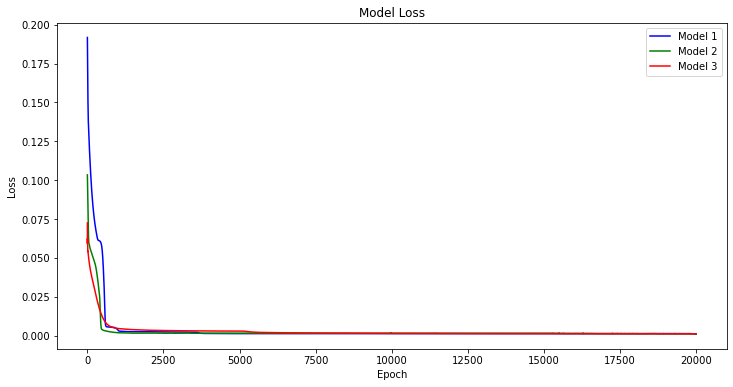

In [12]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "b")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "r")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

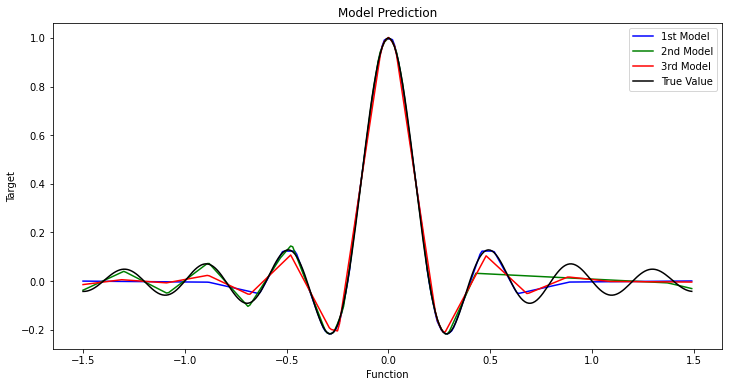

In [13]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="b", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="r", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

In [ ]:
# function2

In [14]:
torch.manual_seed(1)

In [15]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


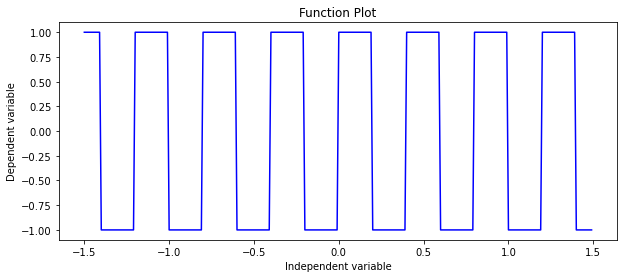

In [16]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "blue")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [ ]:
# model 1

In [17]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x, y)

571
epoch: 500, loss = 0.9994
epoch: 1000, loss = 0.6841
epoch: 1500, loss = 0.2276
epoch: 2000, loss = 0.1078
epoch: 2500, loss = 0.0823
epoch: 3000, loss = 0.0695
epoch: 3500, loss = 0.0603
epoch: 4000, loss = 0.0538
epoch: 4500, loss = 0.0457
epoch: 5000, loss = 0.0426
epoch: 5500, loss = 0.0442
epoch: 6000, loss = 0.0397
epoch: 6500, loss = 0.0380
epoch: 7000, loss = 0.0360
epoch: 7500, loss = 0.0352
epoch: 8000, loss = 0.0368
epoch: 8500, loss = 0.0329
epoch: 9000, loss = 0.0434
epoch: 9500, loss = 0.0356
epoch: 10000, loss = 0.0324
epoch: 10500, loss = 0.0317
epoch: 11000, loss = 0.0307
epoch: 11500, loss = 0.0296
epoch: 12000, loss = 0.0289
epoch: 12500, loss = 0.0358
epoch: 13000, loss = 0.0955
epoch: 13500, loss = 0.0838
epoch: 14000, loss = 0.0781
epoch: 14500, loss = 0.0749
epoch: 15000, loss = 0.0707
epoch: 15500, loss = 0.0680
epoch: 16000, loss = 0.0661
epoch: 16500, loss = 0.0661
epoch: 17000, loss = 0.0602
epoch: 17500, loss = 0.0551
epoch: 18000, loss = 0.0514
epoch: 1

In [ ]:
# model2

In [18]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x, y)

572
epoch: 500, loss = 0.9944
epoch: 1000, loss = 0.6959
epoch: 1500, loss = 0.4548
epoch: 2000, loss = 0.3366
epoch: 2500, loss = 0.2946
epoch: 3000, loss = 0.2709
epoch: 3500, loss = 0.2486
epoch: 4000, loss = 0.2274
epoch: 4500, loss = 0.2072
epoch: 5000, loss = 0.1934
epoch: 5500, loss = 0.1669
epoch: 6000, loss = 0.1607
epoch: 6500, loss = 0.1530
epoch: 7000, loss = 0.1503
epoch: 7500, loss = 0.1496
epoch: 8000, loss = 0.1465
epoch: 8500, loss = 0.1452
epoch: 9000, loss = 0.1458
epoch: 9500, loss = 0.1433
epoch: 10000, loss = 0.1399
epoch: 10500, loss = 0.1388
epoch: 11000, loss = 0.1385
epoch: 11500, loss = 0.1371
epoch: 12000, loss = 0.1390
epoch: 12500, loss = 0.1356
epoch: 13000, loss = 0.1349
epoch: 13500, loss = 0.1348
epoch: 14000, loss = 0.1337
epoch: 14500, loss = 0.1372
epoch: 15000, loss = 0.1324
epoch: 15500, loss = 0.1334
epoch: 16000, loss = 0.1317
epoch: 16500, loss = 0.1299
epoch: 17000, loss = 0.1286
epoch: 17500, loss = 0.1286
epoch: 18000, loss = 0.1257
epoch: 1

In [ ]:
#model 3

In [19]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x, y)

571
epoch: 500, loss = 0.9100
epoch: 1000, loss = 0.6979
epoch: 1500, loss = 0.5169
epoch: 2000, loss = 0.4003
epoch: 2500, loss = 0.3299
epoch: 3000, loss = 0.2888
epoch: 3500, loss = 0.2646
epoch: 4000, loss = 0.2490
epoch: 4500, loss = 0.2388
epoch: 5000, loss = 0.2318
epoch: 5500, loss = 0.2267
epoch: 6000, loss = 0.2220
epoch: 6500, loss = 0.2178
epoch: 7000, loss = 0.2143
epoch: 7500, loss = 0.2115
epoch: 8000, loss = 0.2091
epoch: 8500, loss = 0.2070
epoch: 9000, loss = 0.2052
epoch: 9500, loss = 0.2035
epoch: 10000, loss = 0.2021
epoch: 10500, loss = 0.2009
epoch: 11000, loss = 0.1998
epoch: 11500, loss = 0.1989
epoch: 12000, loss = 0.1979
epoch: 12500, loss = 0.1971
epoch: 13000, loss = 0.1964
epoch: 13500, loss = 0.1947
epoch: 14000, loss = 0.1938
epoch: 14500, loss = 0.1932
epoch: 15000, loss = 0.1924
epoch: 15500, loss = 0.1918
epoch: 16000, loss = 0.1911
epoch: 16500, loss = 0.1898
epoch: 17000, loss = 0.1891
epoch: 17500, loss = 0.1885
epoch: 18000, loss = 0.1878
epoch: 1

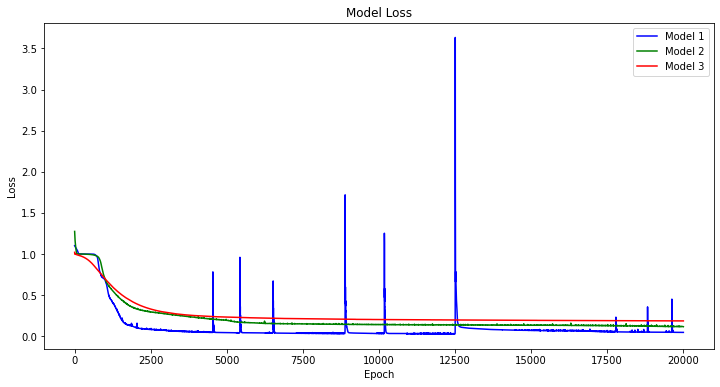

In [24]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "b")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "r")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

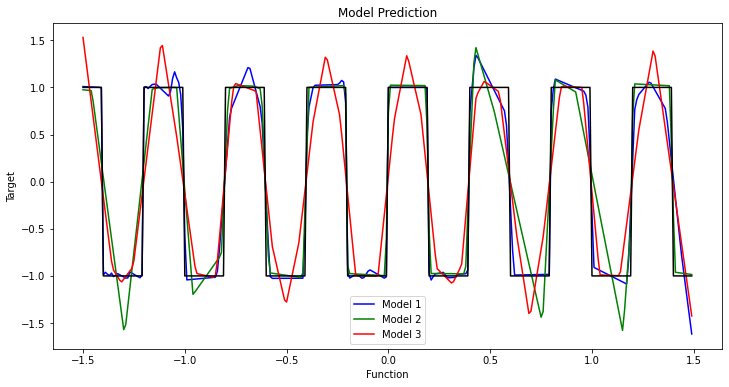

In [25]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="b", label = 'Model 1')
plt.plot(x, m2_prediction.data, color="g", label = 'Model 2')
plt.plot(x, m3_prediction.data, color="r", label = 'Model 3')
plt.plot(x, y, color="black", )
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()
